# 聚类demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
# 读入iris数据
iris = load_iris()
X = iris.data  # data
y = iris.target  # label
scores = np.zeros(5,dtype='float32')

In [3]:
X.shape,y.shape

((150, 4), (150,))

Text(0.5, 1.0, 'Last two features')

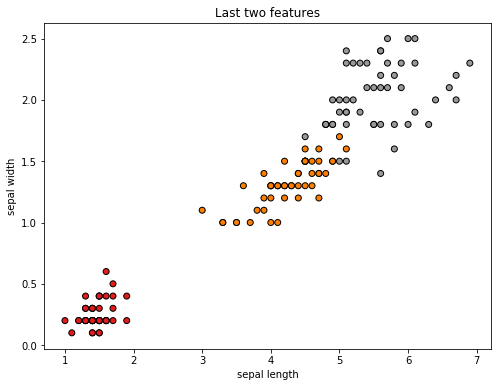

In [4]:
# Plot the points using the last two features
plt.figure(1, figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Last two features')


[]

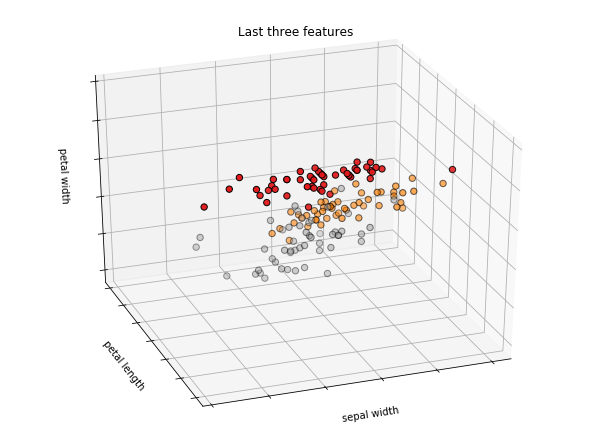

In [5]:
# Plot the points using the last three features
fig = plt.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 1], X[:, 2], X[:, 3], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Last three features")
ax.set_xlabel("sepal width")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("petal length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal width")
ax.w_zaxis.set_ticklabels([])

0.5528190123564091


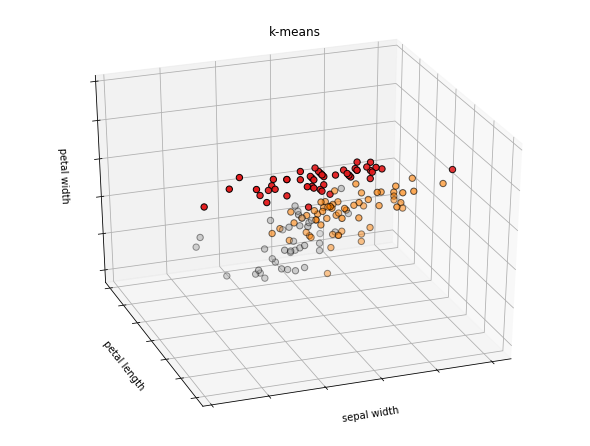

In [6]:
# k-means
np.random.seed(10)  # 利用随机数种子，使得每次生成的随机数相同，从而聚类结果可复现
km = KMeans(n_clusters=3).fit(X)  # k-means
km_labels = km.labels_
# print(labels)
fig = plt.figure(3, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 1], X[:, 2], X[:, 3],
           c=km_labels.astype(np.float), cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("k-means")
ax.set_xlabel("sepal width")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("petal length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal width")
ax.w_zaxis.set_ticklabels([])

score = metrics.silhouette_score(X, km_labels, metric='euclidean')  # 计算k-means的silhouette系数，评估其聚类性能
scores[0] = score
print(score)

### 自己用`numpy`简单写的k-means函数，输出聚类中心`centers`以及样本类别`calc_index`,使用聚类数为2，并计算内评价轮廓系数并与其他算法经行对比

0.681046169211746


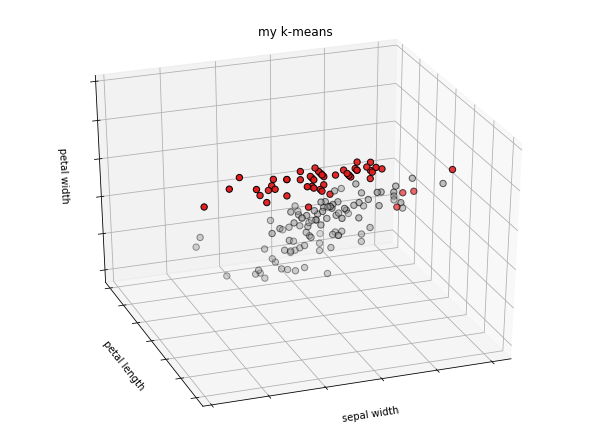

In [7]:
def my_k_means(src, center, itera = 10, rseed = 2000): 
    #形参src为输入向量，形状为 N * d , center为聚类中心的个数， itera为迭代次数， rseed为设置随机数种子
    rng = np.random.RandomState(rseed)
    i = rng.permutation(src.shape[0])[:center] 
    centers = src[i] #从随机的样本中选取center个聚类中心
    new_centers = centers.copy()
    for i in range(itera): #开始迭代
        #print('第'+str(i)+'次迭代') #便于观察迭代到多少次
        calc = np.array([(sum((src[i]-centers[j])**2)) for i in range(src.shape[0]) for j in range(center)]) 
        #这里计算每一个样本与center个聚类中心的欧式距离，结果保存在一个 N * center 的一维numpy数组里
        calc = calc.reshape(src.shape[0], center) #这里reshape成二维便于计算
        calc_index1,calc_index2 = np.where(calc == (calc.min(axis = 1)).reshape(-1,1))
        calc_index = np.array(list(dict(map(lambda a,b:(a,b),calc_index1,calc_index2)).values())) 
        #提取每一个样本距离center个聚类中心最近的索引，保存在calc_index里，形状为 N * 1 的二维数组
        for j in range(center): #这个循环用于更新聚类中心
            new_centers[j] = src[calc_index == j].mean(axis=0) #将离每个聚类中心最近的样本提取出来，计算均值，结果就是新的聚类中心
        if np.all(centers == new_centers): #判定如果所有的聚类中心未发生变动，则跳出循环
            break
        centers = new_centers.copy()
    return centers,calc_index
_,calc_index = my_k_means(X, 2)

fig = plt.figure(3, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 1], X[:, 2], X[:, 3],
           c=calc_index.astype(np.float), cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("my k-means")
ax.set_xlabel("sepal width")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("petal length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal width")
ax.w_zaxis.set_ticklabels([])

score = metrics.silhouette_score(X, calc_index, metric='euclidean')
scores[1] = score
print(score)

0.30775028041821967


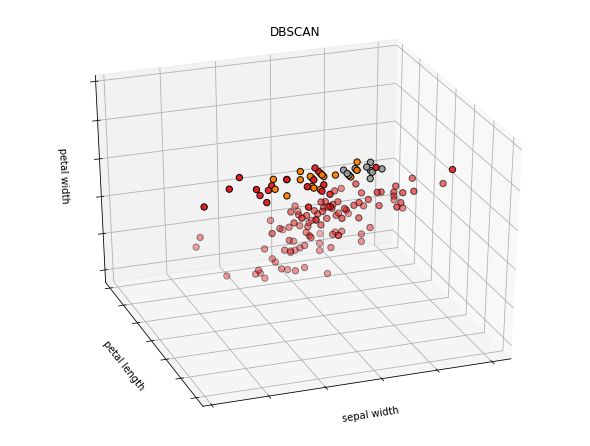

In [8]:
# DBSCAN
db = DBSCAN(eps=.3, min_samples=10).fit(X)
db_labels = db.labels_

fig = plt.figure(4, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 1], X[:, 2], X[:, 3],
           c=db_labels.astype(np.float), cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("DBSCAN")
ax.set_xlabel("sepal width")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("petal length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal width")
ax.w_zaxis.set_ticklabels([])

score = metrics.silhouette_score(X, db_labels, metric='euclidean')  # 计算DBSCAN的silhouette系数，评估其聚类性能
scores[2] = score
print(score)

0.5011761635067201


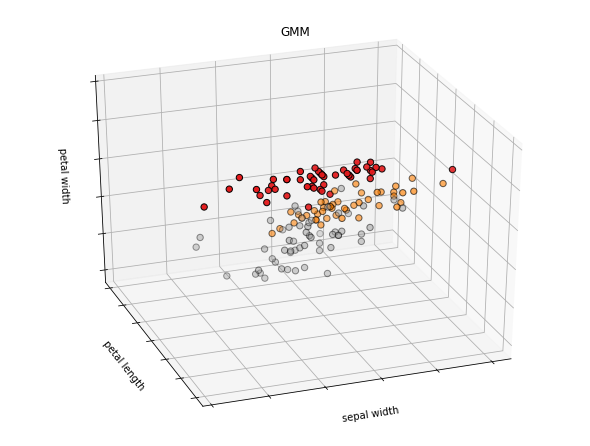

In [9]:
# GMM
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm_labels = gmm.fit_predict(X)

fig = plt.figure(5, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 1], X[:, 2], X[:, 3],
           c=gmm_labels.astype(np.float), cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("GMM")
ax.set_xlabel("sepal width")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("petal length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal width")
ax.w_zaxis.set_ticklabels([])

score = metrics.silhouette_score(X, gmm_labels, metric='euclidean')  # 计算DBSCAN的silhouette系数，评估其聚类性能
scores[3] = score
print(score)

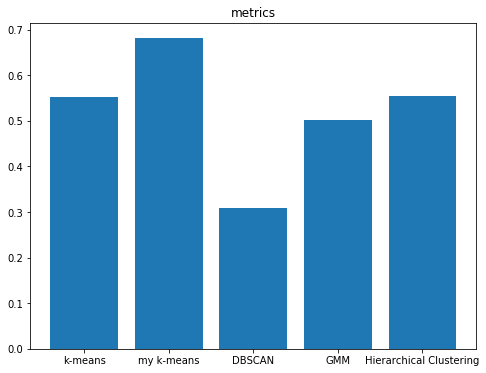

In [10]:
# 层次聚类
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distance_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
ac = ac.fit(X)
#plt.figure(6, figsize=(8, 6))
#plt.title('Hierarchical Clustering')
#plot_dendrogram(ac, truncate_mode='level', p=5)  # plot the top three levels of the dendrogram
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
ac = AgglomerativeClustering(n_clusters=3, linkage="average", affinity='euclidean')
ac = ac.fit(X)
ac_labels = ac.labels_
score = metrics.silhouette_score(X, ac_labels, metric='euclidean')  # 计算层次聚类的silhouette系数，评估其聚类性能
scores[4] = score
#print(scores)
plt.figure(7, figsize=(8, 6))
plt.title('metrics')
plt.bar(['k-means','my k-means','DBSCAN','GMM','Hierarchical Clustering'],scores)
#plt.xticks(range(scores.shape[0]), )
plt.show()